[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Harshitha-Neelakanta/Talking_Face_Avatar/blob/master/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [22]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [23]:
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8

!sudo apt-get install python3.8-distutils

!python --version

!apt-get update

!apt install software-properties-common

!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/Harshitha-Neelakanta/Talking_Face_Avatar.git &> /dev/null

update-alternatives: using /usr/bin/python3.8 to provide /usr/local/bin/python3 (python3) in auto mode
update-alternatives: error: alternative path /usr/bin/python3.9 doesn't exist
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8 is already the newest version (3.8.20-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8-distutils is already the newest version (3.8.20-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Python 3.8.20
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6

In [25]:
#%cd SadTalker
#!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update
!apt install ffmpeg &> /dev/null
!python3.8 -m pip install -r Talking_Face_Avatar/requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
59 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file

Download models (1 mins)

In [27]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash Talking_Face_Avatar/scripts/download_models.sh

Download pre-trained models...
--2024-11-06 07:53:54--  https://github.com/Winfredy/SadTalker/releases/download/v0.0.2/auido2exp_00300-model.pth
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2/auido2exp_00300-model.pth [following]
--2024-11-06 07:53:54--  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2/auido2exp_00300-model.pth
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/569518584/aa56d4af-6a22-4ecb-85f0-8647ff415f04?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20241106%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20241106T075354Z&X-Amz-Expires=300&X-Amz-Signature=fb74291090aeda4ffb64613025d32fab293

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=26, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

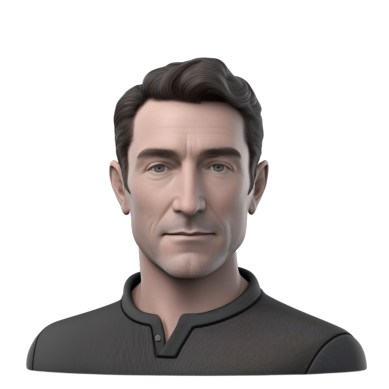

In [28]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('Talking_Face_Avatar/examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='interviewer_image')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('Talking_Face_Avatar/examples/source_image/{}.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('Talking_Face_Avatar/examples/source_image/{}.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation

In [32]:
# selected audio from exmaple/driven_audio
!ls
img = 'Talking_Face_Avatar/examples/source_image/{}.png'.format(default_head_name.value)
print(img)
!python3.8 Talking_Face_Avatar/inference.py --driven_audio Talking_Face_Avatar/examples/driven_audio/harvard.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

checkpoints  gfpgan  results  sample_data  Talking_Face_Avatar
Talking_Face_Avatar/examples/source_image/interviewer_image.png
Talking_Face_Avatar/./checkpoints/epoch_20.pth
Traceback (most recent call last):
  File "Talking_Face_Avatar/inference.py", line 158, in <module>
    main(args)
  File "Talking_Face_Avatar/inference.py", line 55, in main
    preprocess_model = CropAndExtract(path_of_lm_croper, path_of_net_recon_model, dir_of_BFM_fitting, device)
  File "/content/Talking_Face_Avatar/src/utils/preprocess.py", line 51, in __init__
    self.croper = Croper(path_of_lm_croper)
  File "/content/Talking_Face_Avatar/src/utils/croper.py", line 38, in __init__
    self.predictor = dlib.shape_predictor(path_of_lm)
RuntimeError: Unable to open Talking_Face_Avatar/./checkpoints/shape_predictor_68_face_landmarks.dat


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


FileNotFoundError: [Errno 2] No such file or directory: './results/'